# Machine learning: Linear Regression & Clustering

This report will analyse a COVID-19 dataset (available in Kaggle) with information from 22/01/2020 to 27/04/2021. The objective is to identify the top 3 infected countries and predict their future new cases using Linear Regression. Also, to select the country with the higher variance and perform cluster analysis to identify clusters of new COVID cases during the pandemic. 

This project includes:

**A) Exploratory data analysis:**
Reading dataset, identifying patterns, visualising trends and top infected countries.

**B) Linear regression:** 
Building a linear regression model to predict future new cases in the top 3 infected countries: The US, India, and Brazil. Identifying the country with higher variance.

**C) Clustering:**
Building a clustering model for India's COVID cases. Identifying 3 clusters.

**D) Summary (list) of charts**
 

## A) EXPLORATORY DATA ANALYSIS (1-11):
#### - Importing relevant Python libraries for data preparation and visualisation
#### - Reading COVID dataset
#### - Identifying the top 3 infected countries
#### - Grouping daily cumulative cases into WEEKLY cumulative cases (Week 1, Week 2... Week 66) from 22 Jan 2020 to 27 April 2021

Importing libraries that I will need for this section:

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Rezising the height of the scrollable output for plots, graphs, etc. For clarity.
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 37em; }</style>"))

1) Reading the dataset (CSV file) of COVID19 Confirmed Cases by Country as of 03 May 2021

In [30]:
df_original = pd.read_csv('time_series_covid19_confirmed_global_downloaded 04052021.csv')

In [31]:
#Showing the first 5 rows
df_original.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,58730,58843,59015,59225,59370,59576,59745,59939,60122,60300
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,130409,130537,130606,130736,130859,130977,131085,131185,131238,131276
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,120736,120922,121112,121344,121580,121866,122108,122311,122522,122717
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13024,13060,13083,13121,13148,13198,13232,13232,13282,13295
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,25492,25609,25710,25942,26168,26431,26652,26815,26993,27133


2) Checking if there is any NaN/NULL/Empty value in the column COUNTRY/REGION.

=> Not any null value for Country

In [32]:
#If true, I need to fill missing values. If false, I can proceed.
df_original['Country/Region'].isnull().any()

False

3) 

- For clarity and readability, I will change the name "Country/Region" to "Country".

- Also, I drop Province/State, Lat and Long information because it is not necessary for my analysis.

In [33]:
dfr = df_original.rename(columns={'Country/Region' : 'Country'})
df = dfr.drop(dfr.columns[[0,2,3]], axis=1)
df.head(10)

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,58730,58843,59015,59225,59370,59576,59745,59939,60122,60300
1,Albania,0,0,0,0,0,0,0,0,0,...,130409,130537,130606,130736,130859,130977,131085,131185,131238,131276
2,Algeria,0,0,0,0,0,0,0,0,0,...,120736,120922,121112,121344,121580,121866,122108,122311,122522,122717
3,Andorra,0,0,0,0,0,0,0,0,0,...,13024,13060,13083,13121,13148,13198,13232,13232,13282,13295
4,Angola,0,0,0,0,0,0,0,0,0,...,25492,25609,25710,25942,26168,26431,26652,26815,26993,27133
5,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,1227,1227,1228,1232,1232,1232,1232,1232,1232,1232
6,Argentina,0,0,0,0,0,0,0,0,0,...,2845872,2860884,2879677,2905172,2928890,2954943,2977363,2993865,3005259,3021179
7,Armenia,0,0,0,0,0,0,0,0,0,...,212878,213288,213469,214064,214872,215528,216064,216596,216863,217008
8,Australia,0,0,0,0,0,0,0,0,0,...,123,123,123,123,123,124,124,124,124,124
9,Australia,0,0,0,0,3,4,4,4,4,...,5420,5428,5440,5449,5464,5477,5481,5484,5489,5496


4) As there are countries with multiple rows, due to multiple Provinces/states, such as Australia (refer to step 3 table), I will sum all duplicated rows to get the total of each country. Then I will display the cases as of 03 May 2021 per country.

Also, groupby() converts by default the column COUNTRY into index.

In [34]:
#Grouping countries
df_groupbycountry = df.groupby("Country").sum()

#Displaying the first 10 rows. Australia has now only 1 row which is the total.
df_groupbycountry.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,58730,58843,59015,59225,59370,59576,59745,59939,60122,60300
Albania,0,0,0,0,0,0,0,0,0,0,...,130409,130537,130606,130736,130859,130977,131085,131185,131238,131276
Algeria,0,0,0,0,0,0,0,0,0,0,...,120736,120922,121112,121344,121580,121866,122108,122311,122522,122717
Andorra,0,0,0,0,0,0,0,0,0,0,...,13024,13060,13083,13121,13148,13198,13232,13232,13282,13295
Angola,0,0,0,0,0,0,0,0,0,0,...,25492,25609,25710,25942,26168,26431,26652,26815,26993,27133
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,1227,1227,1228,1232,1232,1232,1232,1232,1232,1232
Argentina,0,0,0,0,0,0,0,0,0,0,...,2845872,2860884,2879677,2905172,2928890,2954943,2977363,2993865,3005259,3021179
Armenia,0,0,0,0,0,0,0,0,0,0,...,212878,213288,213469,214064,214872,215528,216064,216596,216863,217008
Australia,0,0,0,0,4,5,5,6,9,9,...,29663,29680,29717,29750,29773,29798,29811,29824,29838,29850


5) Displaying the top 5 infected countries as of 03 May 2021, in order to identify the top 3.

In [35]:
df_sorted = df_groupbycountry.sort_values('5/3/21', ascending=False)
df_sorted.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21
Country,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,6,6,8,...,32045113,32077178,32124869,32175725,32230850,32289049,32346971,32392274,32421641,32471562
India,0,0,0,0,0,0,0,0,1,1,...,16960172,17313163,17636186,17997113,18376421,18762976,19164969,19557457,19925517,20282833
Brazil,0,0,0,0,0,0,0,0,0,0,...,14308215,14340787,14369423,14441563,14521289,14590678,14659011,14725975,14754910,14779529
France,0,0,2,3,3,3,4,5,5,5,...,5534656,5559121,5565080,5595403,5626985,5653533,5677835,5703505,5713393,5717160
Turkey,0,0,0,0,0,0,0,0,0,0,...,4591416,4629969,4667281,4710582,4751026,4788700,4820591,4849408,4875388,4900121
Russia,0,0,0,0,0,0,0,0,0,2,...,4699988,4708640,4717321,4725252,4732981,4742142,4750755,4759902,4768476,4776844
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,4418710,4420443,4422562,4425259,4427390,4429849,4432246,4434157,4435831,4437505
Italy,0,0,0,0,0,0,0,0,0,2,...,3949517,3962674,3971114,3981512,3994894,4009208,4022653,4035617,4044762,4050708
Spain,0,0,0,0,0,0,0,0,0,0,...,3468617,3468617,3488469,3496134,3504799,3514942,3524077,3524077,3524077,3540430


=> **The top 3 infected countries as of 03 May 2021 are US, India and Brazil.**

6) Creating a new dataframe with only US, India and Brazil information. I will drop the data of the rest of the countries.

In [36]:
#Selecting top 3 countries
df_top3 = df_sorted.query("Country == 'US' | Country == 'India' | Country == 'Brazil'")
df_top3

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21
Country,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,6,6,8,...,32045113,32077178,32124869,32175725,32230850,32289049,32346971,32392274,32421641,32471562
India,0,0,0,0,0,0,0,0,1,1,...,16960172,17313163,17636186,17997113,18376421,18762976,19164969,19557457,19925517,20282833
Brazil,0,0,0,0,0,0,0,0,0,0,...,14308215,14340787,14369423,14441563,14521289,14590678,14659011,14725975,14754910,14779529


7) Visualising the top 3 infected countries: US, India and Brazil with a bar graph.

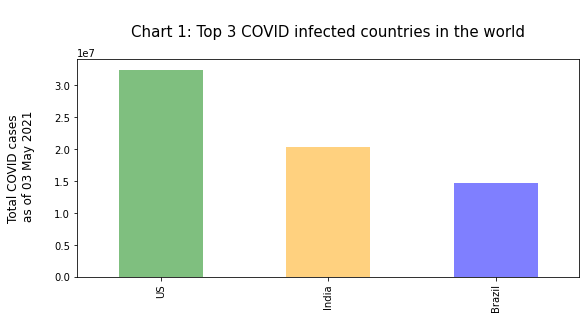

In [37]:
#Figure size
plt.figure(figsize=(9, 4))

#Plot
df_top3['5/3/21'].plot.bar(align='center',
                   alpha=0.5, color=['green', 'orange', 'blue'], ecolor='black', capsize=10)

#Labels
plt.ylabel('Total COVID cases\n as of 03 May 2021\n', fontsize=12);
plt.xlabel("")
plt.title('\nChart 1: Top 3 COVID infected countries in the world\n', fontsize=15)

plt.show()

8) The next challenge is to convert DAILY into WEEKLY data.

For example,

- 22 January 2020 to 28 January 2020 will be Week 1,

- 29 January 2020 to 4 February 2020 will be Week 2, etc.

Note: Currently I have 468 columns for daily new cases from 22 January 2020 to 03 May 2021, which should be around 67 weeks. Although, as the last week has only 6 days, I will delete these days because it could affect my results.

-> Therefore, **I will only consider 66 weeks from 22 January 2020 to 27 April 2021.**

In [38]:
##Creating a new dataframe with only data until 27 April 2021 (dropping last 6 columns)
df_top3_66weeks = df_top3.drop(columns=['4/28/21', '4/29/21', '4/30/21', '5/1/21', '5/2/21', '5/3/21'], axis=1)

##Grouping values in 7 days and taking the last value (total of the week)
df_top3_cumulative = df_top3_66weeks.groupby([[i//7 for i in range(0,462)]], axis = 1).last()

##Renaming the title of each column starting from 1 (1, 2, 3... instead of 0, 1, 2...)
df_top3_cumulative.columns = [(i+1) for i,_ in enumerate(df_top3_cumulative.columns)]

##Total cases per week of Brazil, India and the US
df_top3_cumulative

,1,2,3,4,5,6,7,8,9,10,...,57,58,59,60,61,62,63,64,65,66
Country,,,,,,,,,,,,,,,,,,,,,
US,5,11,13,14,16,74,782,6512,56755,192301,...,28303233,28764033,29167616,29551309,29926950,30395171,30847348,31345985,31799237,32175725
India,0,3,3,3,3,5,56,142,536,1397,...,11030176,11139516,11262707,11438734,11734058,12149335,12801785,13873825,15616130,17997113
Brazil,0,0,0,0,0,2,31,321,2247,5717,...,10257875,10646926,11122429,11603535,12130019,12658109,13100580,13599994,14043076,14441563


9) Visualising how the cumulative cases has evolved from Week 1 to Week 66 in the top 3 infected countries

Conclusions from this chart -> 

- US is the top 1 infected country. However, its hardest situation was between Weeks 42 and 52.
- Although India still has less total cases than US, the last few weeks has seen greatly increased new cases and it is expected to keep growing.

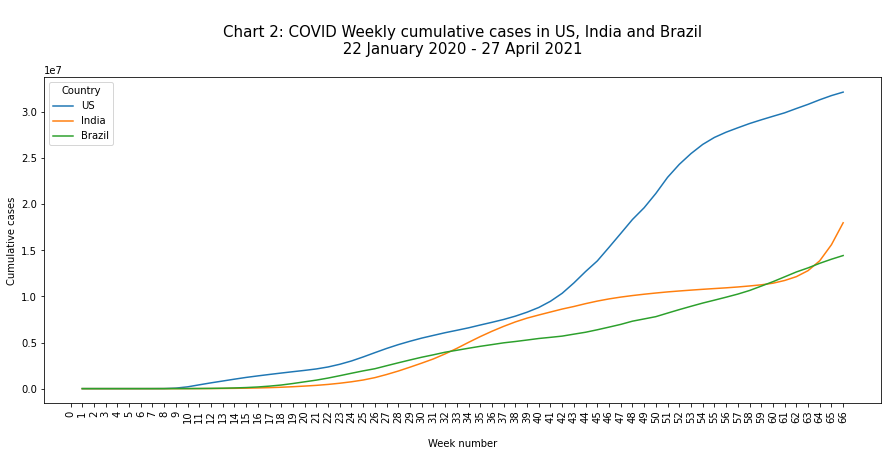

In [39]:
##Reseting index to include Country names in chart
df2 = df_top3_cumulative.reset_index()

#Preparing values
df3 = df2.melt(id_vars='Country', var_name='Week', value_name='Cumulative cases')

##size of chart
plt.figure(figsize=(15, 6))

#Load lineplot with data
df4 = sns.lineplot(x='Week', y='Cumulative cases', hue='Country', data=df3)

df4.set_title("\nChart 2: COVID Weekly cumulative cases in US, India and Brazil\n 22 January 2020 - 27 April 2021 \n", fontsize=15)
plt.xlabel("\nWeek number")
plt.xticks(np.arange(67), rotation=90)

plt.show()

10) Now I will calculate NEW CASES per week, instead of CUMULATIVE CASES, so I can perform a better predictive model, clustering and graph analytics. 

In [40]:
#Difference between each column and previous column result in the new cases for each week
df_top3_newcases = df_top3_cumulative[df_top3_cumulative.columns[0:66]].diff(axis=1)

#Fixing first week values
df_top3_newcases.at[['Brazil','India'],1]=0
df_top3_newcases.at[['US'],1]=5

df_top3_newcases

,1,2,3,4,5,6,7,8,9,10,...,57,58,59,60,61,62,63,64,65,66
Country,,,,,,,,,,,,,,,,,,,,,
US,5.0,6.0,2.0,1.0,2.0,58.0,708.0,5730.0,50243.0,135546.0,...,476427.0,460800.0,403583.0,383693.0,375641.0,468221.0,452177.0,498637.0,453252.0,376488.0
India,0.0,3.0,0.0,0.0,0.0,2.0,51.0,86.0,394.0,861.0,...,92856.0,109340.0,123191.0,176027.0,295324.0,415277.0,652450.0,1072040.0,1742305.0,2380983.0
Brazil,0.0,0.0,0.0,0.0,0.0,2.0,29.0,290.0,1926.0,3470.0,...,335894.0,389051.0,475503.0,481106.0,526484.0,528090.0,442471.0,499414.0,443082.0,398487.0


11) Visualising weekly NEW CASES from Week 1 to Week 66 for US, India and Brazil:

As the Line plot shows, during the last few weeks India has greatly increased its COVID cases and is at the most difficult time of the pandemic. On the other hand, US has been recovering and should keep decreasing its cases. Lastly, Brazil has maintained a uniform number of new cases from the beginning of the pandemic until now.

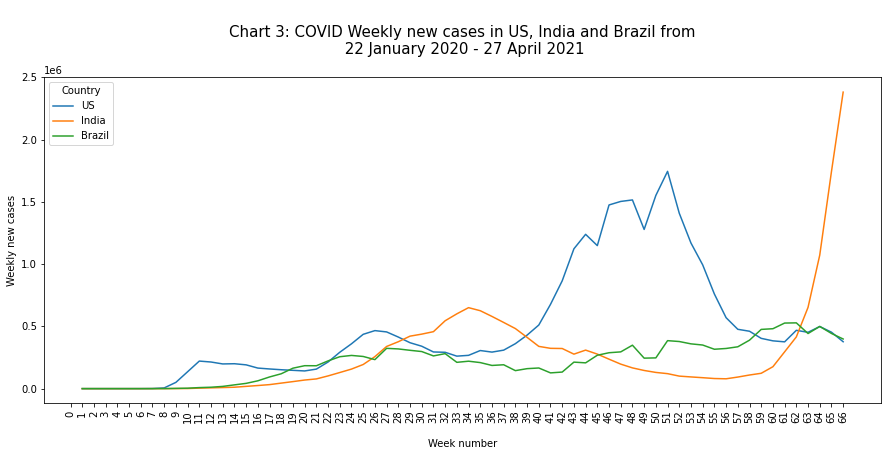

In [41]:
##Reseting index to include Country names in chart
df5 = df_top3_newcases.reset_index()

##Melting
df6 = df5.melt(id_vars='Country', var_name='Week', value_name='Weekly new cases')

##size of chart
plt.figure(figsize=(15, 6))

##Creating chart
df7 = sns.lineplot(x='Week', y='Weekly new cases', hue='Country', data=df6)

##Title
df7.set_title("\nChart 3: COVID Weekly new cases in US, India and Brazil from\n 22 January 2020 - 27 April 2021\n", fontsize=15)

plt.xlabel("\nWeek number")
plt.xticks(np.arange(67), rotation=90)

plt.show()

## B) PREDICTIVE MODELLING - LINEAR REGRESSION (12-19):
#### - Converting columns into rows, in order to perform predictive modelling. Using transpose() function.
#### - Running Linear Regression model for each of the top 3 countries: Brazil, India and US.
#### - Determining the variance on each of the 3 models, and selecting the one with higher variance.

Note -> In order to perform better machine learning analysis, I have decided to base my analysis on NEW CASES PER WEEK, so I will count the cases confirmed only in the respective week. This will allow me to see more variations on data according to different times of the year, and will help me to get a more meaningful clustering analysis.

The study case does not identify that I should use New cases instead of Total (cumulative) cases, but it is suggested from the last paragraph of the section b)Clustering, when it mentions that clusters might be in the top of the graph on January, and then come down, and then come up again. That would be ONLY possible if I analyse NEW cases per week, instead of CUMULATIVE.

Dataframe from previous section utilised: df_newcases

Importing Machine Learning libraries:

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

12) First of all, I need to swap columns and rows of my cumulative cases data called "df_top3_cumulative"

My new dataframe is called "df_cumulative", and it contains weekly cumulative COVID data of Brazil, India and US.

In [43]:
#Swapping columns and rows
df_newcases = df_top3_newcases.transpose()

#Resetting index
df_newcases = df_newcases.reset_index()

#assigning new names of columns
df_newcases.columns = ['Week number', 'US', 'India', 'Brazil']

df_newcases

,Week number,US,India,Brazil
0,1,5.0,0.0,0.0
1,2,6.0,3.0,0.0
2,3,2.0,0.0,0.0
3,4,1.0,0.0,0.0
4,5,2.0,0.0,0.0
...,...,...,...,...
61,62,468221.0,415277.0,528090.0
62,63,452177.0,652450.0,442471.0
63,64,498637.0,1072040.0,499414.0
64,65,453252.0,1742305.0,443082.0


### - Linear Regression for Brazil

13) Visualisation: Scatter Plot of Brazil new COVID cases 22 Jan 2020 - 27 - April 2021

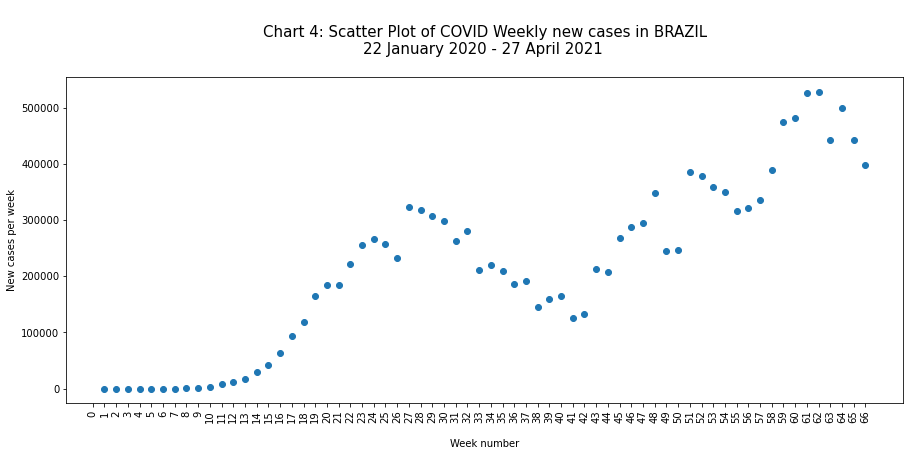

In [44]:
#Size
plt.figure(figsize=(15, 6))

#Scatter plot
plt.scatter(df_newcases['Week number'], df_newcases['Brazil'])

#Labels and title
plt.xticks(rotation=90)
plt.title("\nChart 4: Scatter Plot of COVID Weekly new cases in BRAZIL\n22 January 2020 - 27 April 2021 \n", fontsize=15)
plt.ylabel("New cases per week")
plt.xlabel("\nWeek number")
plt.xticks(np.arange(67), rotation=90)

plt.show()

14) Training and testing Linear Regression model for BRAZIL

Coefficient of determination: 0.81


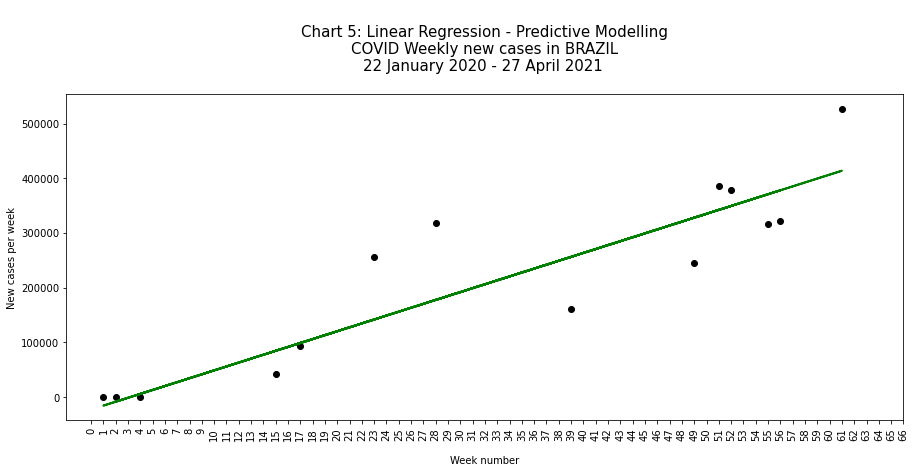

In [45]:
#Assigning X and Y to independent and dependent variables, respectively
X = df_newcases[['Week number']] #Independent (Week number)
y = df_newcases['Brazil'] #Dependent (Count of infection per week)

#Selecting train and test data randomly. 80% train, 20% test
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

#Creating Linear Regression object 'regr'
regr = LinearRegression()

#Training the model
regr.fit(X_train,y_train)

# Make predictions using the testing set X_test
y_pred = regr.predict(X_test)

# Coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.figure(figsize=(15, 6))

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='green', linewidth=2)

#Plot title
plt.title("\nChart 5: Linear Regression - Predictive Modelling\nCOVID Weekly new cases in BRAZIL\n22 January 2020 - 27 April 2021 \n", fontsize=15)
plt.ylabel("New cases per week")
plt.xlabel("\nWeek number")
plt.xticks(np.arange(67), rotation=90)

plt.show()

15) BRASIL Conclusion: After multiple iterations, the COEFFICIENT OF DETERMINATION is approx. 0.7, the variance between the model and the actual data is low. 

=> The line shows that the cases has been increasing.

=> **Brazil predictive model for new cases has low variance.**

### - Linear Regression for India

16) Visualisation: Scatter Plot of INDIA new COVID cases 22 Jan 2020 - 27 - April 2021

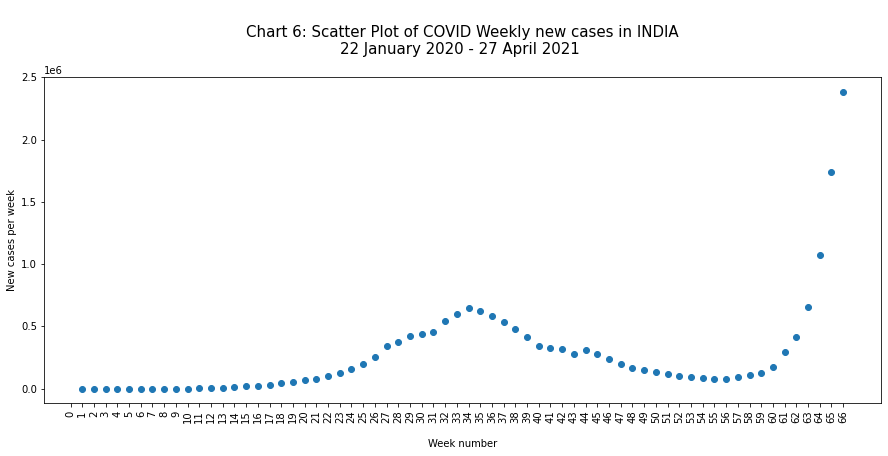

In [46]:
plt.figure(figsize=(15, 6))
plt.scatter(df_newcases['Week number'], df_newcases['India'])
plt.xticks(rotation=90)
plt.title("\nChart 6: Scatter Plot of COVID Weekly new cases in INDIA\n22 January 2020 - 27 April 2021 \n", fontsize=15)
plt.ylabel("New cases per week")
plt.xlabel("\nWeek number")
plt.xticks(np.arange(67), rotation=90)
plt.show()

17) Training and testing Linear Regression for INDIA

Coefficient of determination: -3.66


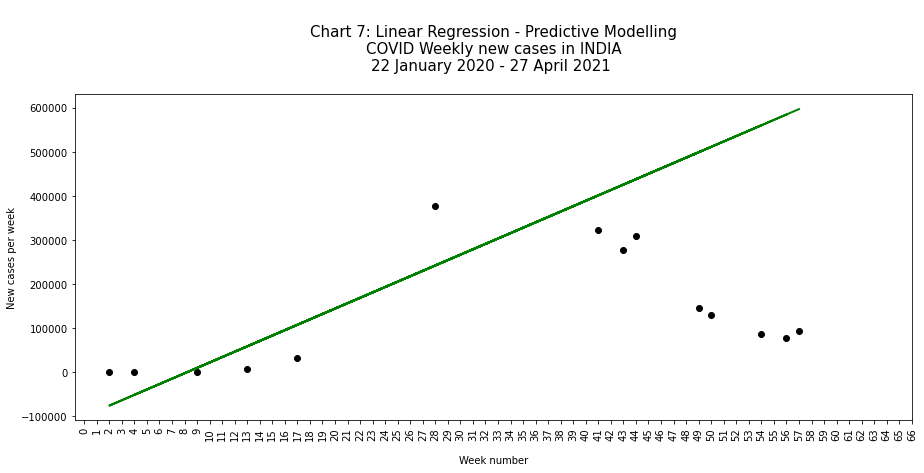

In [47]:
#Assigning X and Y to independent and dependent variables, respectively
X = df_newcases[['Week number']] #Independent (Week number)
y = df_newcases['India'] #Dependent (Count of infection per week)

#Selecting train and test data randomly. 80% train, 20% test
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

#Creating Linear Regression object 'regr'
regr = LinearRegression()

#Training the model
regr.fit(X_train,y_train)

# Make predictions using the testing set X_test
y_pred = regr.predict(X_test)

# Coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.figure(figsize=(15, 6))

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='green', linewidth=2)

#Plot title
plt.title("\nChart 7: Linear Regression - Predictive Modelling\nCOVID Weekly new cases in INDIA\n22 January 2020 - 27 April 2021 \n", fontsize=15)
plt.ylabel("New cases per week")
plt.xlabel("\nWeek number")
plt.xticks(np.arange(67), rotation=90)

plt.show()

18) INDIA Conclusion: After multiple iterations, the COEFFICIENT OF DETERMINATION is approx. 0.2, the variance between the model and the actual data is very high.

=> The line shows that the cases has been increasing.

=> **India predictive model for new cases has very high variance.**

=> **India has higher variance than US and BRAZIL.**

### - Linear Regression for US

19) Visualisation: Scatter Plot of US new COVID cases 22 Jan 2020 - 27 - April 2021

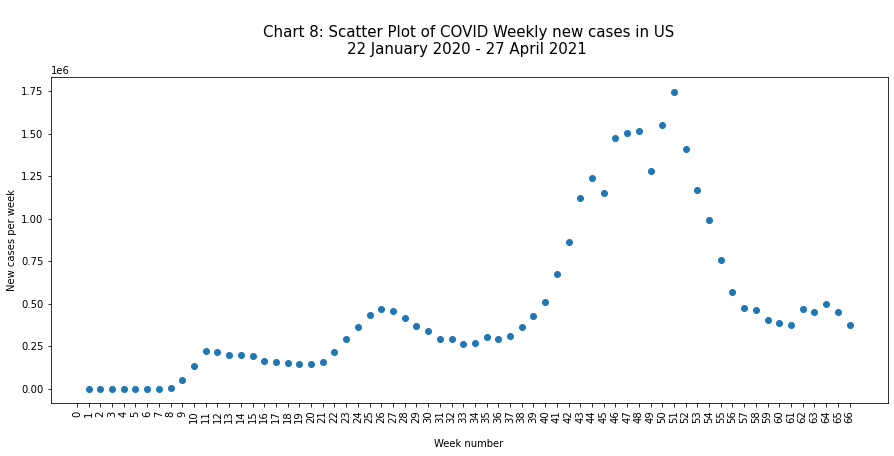

In [48]:
plt.figure(figsize=(15, 6))
plt.scatter(df_newcases['Week number'], df_newcases['US'])
plt.xticks(rotation=90)
plt.title("\nChart 8: Scatter Plot of COVID Weekly new cases in US\n22 January 2020 - 27 April 2021 \n", fontsize=15)
plt.ylabel("New cases per week")
plt.xlabel("\nWeek number")
plt.xticks(np.arange(67), rotation=90)
plt.show()

20) Training and testing Linear Regression model for US

Coefficient of determination: 0.38


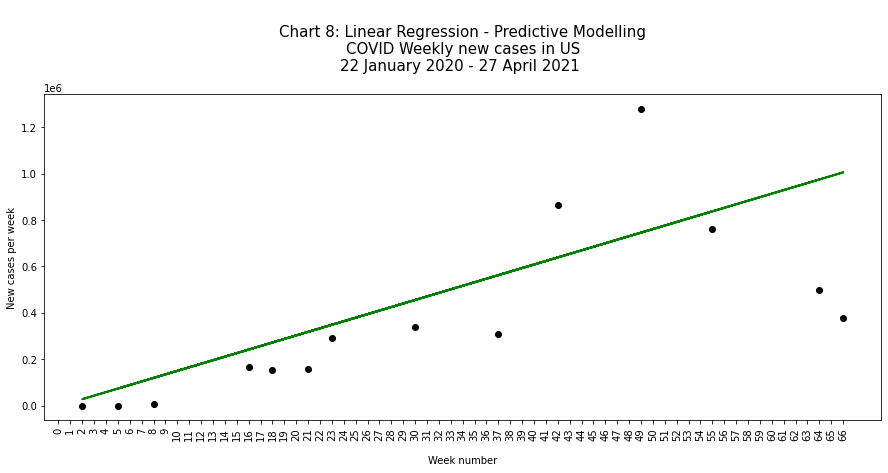

In [49]:
#Assigning X and Y to independent and dependent variables, respectively
X = df_newcases[['Week number']] #Independent (Week number)
y = df_newcases['US'] #Dependent (Count of infection per week)

#Selecting train and test data randomly. 80% train, 20% test
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

#Creating Linear Regression object 'regr'
regr = LinearRegression()

#Training the model
regr.fit(X_train,y_train)

# Make predictions using the testing set X_test
y_pred = regr.predict(X_test)

# Coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.figure(figsize=(15, 6))

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='green', linewidth=2)

#Plot title
plt.title("\nChart 8: Linear Regression - Predictive Modelling\nCOVID Weekly new cases in US\n22 January 2020 - 27 April 2021 \n", fontsize=15)
plt.ylabel("New cases per week")
plt.xlabel("\nWeek number")
plt.xticks(np.arange(67), rotation=90)

plt.show()

21) US Conclusion: After multiple iterations, the COEFFICIENT OF DETERMINATION is approx. 0.3, the variance between the model and the actual data is very high.

=> The line shows that the cases has been increasing.

=> **US predictive model for new cases has very high variance.**

### Final conclusion for section A) PREDICTIVE MODELLING:

- According to Linear Regression models, India has the highest variance, especially because of the last few weeks from early April that the COVID cases greatly increased.

- Linear Regression is not the best model for predicting NEW WEEKLY CASES, especially for India and US.

- INDIA has been selected for the Clustering model (next section) because of its very high variance.

## C) CLUSTERING MODEL (22-26):
#### - Determine the best K value (number of clusters) for INDIA Covid new cases data using the ELBOW METHOD.
#### - Plot clusters in a graphic and identify them with different colours.
#### - Conclusions about K-Means Clustering analysis for INDIA.

Importing Clustering Python libraries:

In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

22) Creating new dataframe 'df_ind' similar to df_newcases but without US and Brazil data

In [51]:
df_ind = df_newcases.drop(df_newcases[['US', 'Brazil']], axis=1)
df_ind

,Week number,India
0,1,0.0
1,2,3.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
61,62,415277.0
62,63,652450.0
63,64,1072040.0
64,65,1742305.0


23) Elbow method for determining the best K value (number of clusters):

In [52]:
#Range
k_rng = range(1,11)

#Empty list SSE
sse = []

#Inertia_ function
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_ind[['Week number', 'India']])
    sse.append(km.inertia_)

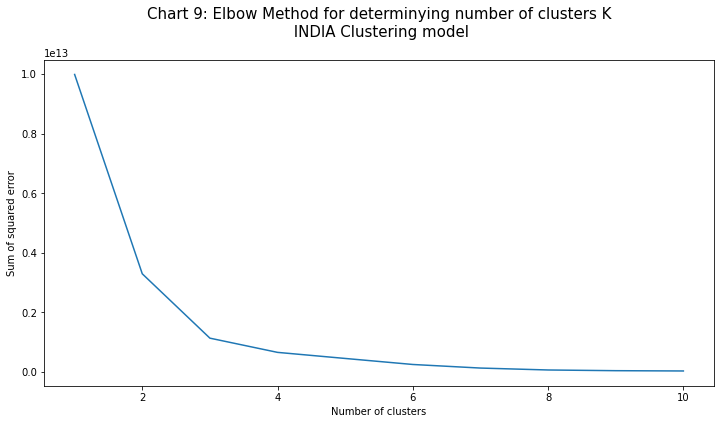

In [53]:
#Plotting Elbow Method
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), sse)
plt.title('Chart 9: Elbow Method for determinying number of clusters K\n INDIA Clustering model\n', fontsize=15)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error')
plt.show()

=> **The best K value according to Elbow Method is 3 clusters. Therefore, I will consider 3 clusters on my clustering model.**

24) First iteration of K-Means clustering

In [54]:
#Assigning number of clusters
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [55]:
#Creating cluster predictions
y_predicted = km.fit_predict(df_ind[['Week number', 'India']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0],
      dtype=int32)

In [56]:
#Creating cluster column in dataframe
df_ind['cluster'] = y_predicted
df_ind

,Week number,India,cluster
0,1,0.0,1
1,2,3.0,1
2,3,0.0,1
3,4,0.0,1
4,5,0.0,1
...,...,...,...
61,62,415277.0,2
62,63,652450.0,2
63,64,1072040.0,2
64,65,1742305.0,0


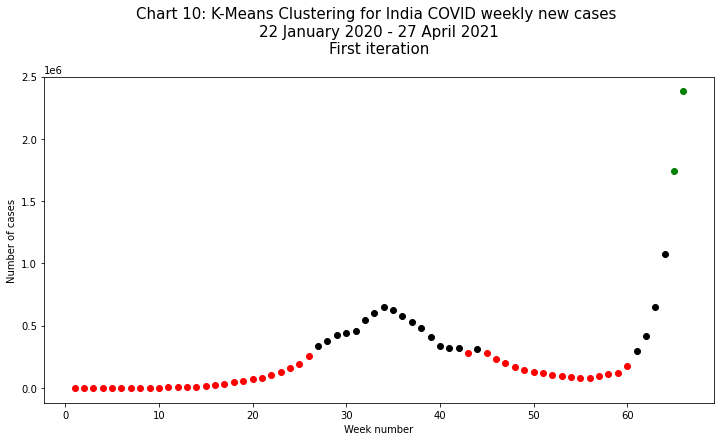

In [57]:
#Plotting scatters for the 3 clusters:
df1 = df_ind[df_ind.cluster==0]
df2 = df_ind[df_ind.cluster==1]
df3 = df_ind[df_ind.cluster==2]

plt.figure(figsize=(12, 6))
plt.title('Chart 10: K-Means Clustering for India COVID weekly new cases \n22 January 2020 - 27 April 2021\nFirst iteration\n', fontsize=15)

plt.scatter(df1['Week number'], df1['India'], color = 'green')
plt.scatter(df2['Week number'], df2['India'], color = 'red')
plt.scatter(df3['Week number'], df3['India'], color = 'black')

plt.xlabel('Week number')
plt.ylabel('Number of cases')

plt.show()

As shown in Chart 10, these 3 clusters are not too accurate as there is a green area between the two black areas. This means that I need to improve and stabilise the clusters.

25) Second iteration of K-Means Clustering. Scaling Week Number and India columns with values from 0 to 1.

In [58]:
#Scale 0 to 1 for Week number and India columns, using MinMaxScaler() function:
scaler = MinMaxScaler()

scaler.fit(df_ind[['India']])
df_ind[['India']] = scaler.transform(df_ind[['India']])

scaler.fit(df_ind[['Week number']])
df_ind[['Week number']] = scaler.transform(df_ind[['Week number']])

df_ind

,Week number,India,cluster
0,0.000000,0.000000,1
1,0.015385,0.000001,1
2,0.030769,0.000000,1
3,0.046154,0.000000,1
4,0.061538,0.000000,1
...,...,...,...
61,0.938462,0.174414,2
62,0.953846,0.274025,2
63,0.969231,0.450251,2
64,0.984615,0.731759,0


In [59]:
#Creating new cluster predictions with scaled values (second iteration)
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_ind[['Week number', 'India']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2],
      dtype=int32)

In [60]:
#Displaying new cluster predictions (improved)
df_ind['cluster'] = y_predicted
df_ind

,Week number,India,cluster
0,0.000000,0.000000,1
1,0.015385,0.000001,1
2,0.030769,0.000000,1
3,0.046154,0.000000,1
4,0.061538,0.000000,1
...,...,...,...
61,0.938462,0.174414,0
62,0.953846,0.274025,0
63,0.969231,0.450251,2
64,0.984615,0.731759,2


In [61]:
#Cluster centers
km.cluster_centers_

array([[0.69230769, 0.13072069],
       [0.20769231, 0.02862344],
       [0.98461538, 0.72733657]])

Plotting K-Means Clustering Improved (2nd iteration)

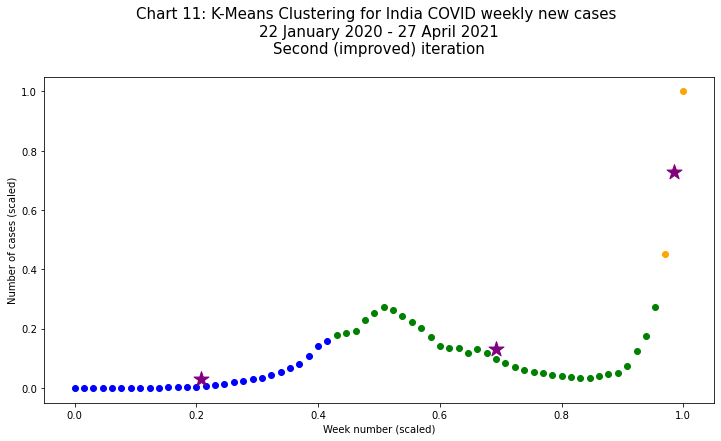

In [62]:
df1 = df_ind[df_ind.cluster==0]
df2 = df_ind[df_ind.cluster==1]
df3 = df_ind[df_ind.cluster==2]

plt.figure(figsize=(12, 6))
plt.title('Chart 11: K-Means Clustering for India COVID weekly new cases \n22 January 2020 - 27 April 2021\nSecond (improved) iteration\n', fontsize=15)

plt.scatter(df1['Week number'], df1['India'], color = 'green')
plt.scatter(df2['Week number'], df2['India'], color = 'blue')
plt.scatter(df3['Week number'], df3['India'], color = 'orange')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker='*', s=250)

plt.xlabel('Week number (scaled)')
plt.ylabel('Number of cases (scaled)')

plt.show()

**26) Conclusions of K-Means Clustering of INDIA situation:**

- India has three clusters clearly defined:
    - Week 1 to Week 25: first cluster shows low number of cases and low growth
    - Week 26 to Week 62: second cluster started high, and then went down and up again.
    - Week 63 to present: very high number of cases from early April to present.

- The infection rate has been increasing in India since the beginning of the pandemic. 

- India is facing a very difficult situation at the moment, with very high number of cases since early April 2021.

## D) LIST OF CHARTS

    1) Bar Graph: Top 3 COVID infected countries in the world
    2) Line Graph: COVID Weekly CUMULATIVE cases in US, India and Brazil
    3) Line Graph: COVID Weekly NEW cases in US, India and Brazil
    4) Scatter Graph: COVID Weekly new cases in BRAZIL
    5) Linear Regression: COVID Weekly new cases in BRAZIL
    6) Scatter Graph: COVID Weekly new cases in INDIA
    7) Linear Regression: COVID Weekly new cases in INDIA
    8) Scatter Graph: COVID Weekly new cases in US
    9) Linear Regression: COVID Weekly new cases in US
    10) Clustering K-Means: India COVID weekly new cases (First Iteration)
    11) Clustering K-Means: India COVID weekly new cases (Second Iteration)

# END OF THE NOTEBOOK. 

# PREPARED BY GONZALO SANCHEZ 

# www.linkedin.com/in/gonzalosanchez1